Clinical Data EDA

In [1]:
!pip install openpyxl

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel("app_data.xlsx", sheet_name ="All cases")
data.head()

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Diagnosis,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
0,12.68,16.9,female,148.0,37.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.10,31.9,male,147.0,69.5,2.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
2,14.14,23.3,female,163.0,62.0,4.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN
3,16.37,20.6,female,165.0,56.0,3.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
4,11.08,16.9,female,163.0,45.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN


In [4]:
print(data.shape)

(781, 58)


In [5]:
# defining clinical columns 
clin_data = data[['Peritonitis', 'Migratory_Pain', 'Lower_Right_Abd_Pain', 'Contralateral_Rebound_Tenderness', 
            'Ipsilateral_Rebound_Tenderness', 'Coughing_Pain', 'Psoas_Sign', 'Nausea', 
            'Loss_of_Appetite', 'Body_Temperature', 'Dysuria', 'Stool','Diagnosis','Severity','Management']]
clin_data.head()

,Peritonitis,Migratory_Pain,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,Ipsilateral_Rebound_Tenderness,Coughing_Pain,Psoas_Sign,Nausea,Loss_of_Appetite,Body_Temperature,Dysuria,Stool,Diagnosis,Severity,Management
0,no,no,yes,yes,no,no,yes,no,yes,37.0,no,normal,appendicitis,uncomplicated,conservative
1,no,yes,yes,yes,no,no,yes,no,yes,36.9,yes,normal,no appendicitis,uncomplicated,conservative
2,no,no,yes,yes,no,no,yes,no,no,36.6,no,constipation,no appendicitis,uncomplicated,conservative
3,no,yes,yes,no,no,no,yes,yes,yes,36.0,yes,normal,no appendicitis,uncomplicated,conservative
4,no,no,yes,yes,no,yes,yes,yes,yes,36.9,no,constipation,appendicitis,uncomplicated,conservative


In [6]:
clin_data = clin_data.replace({'no':0, 'yes':1, 'normal':0, 'constipation':1, 'diarrhea':2,'constipation, diarrhea':3,'local':1, 'generalized':2})
clin_data.head(10)

C:\Users\Mahima Batheja\AppData\Local\Temp\ipykernel_31132\2829915390.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clin_data = clin_data.replace({'no':0, 'yes':1, 'normal':0, 'constipation':1, 'diarrhea':2,'constipation, diarrhea':3,'local':1, 'generalized':2})


,Peritonitis,Migratory_Pain,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,Ipsilateral_Rebound_Tenderness,Coughing_Pain,Psoas_Sign,Nausea,Loss_of_Appetite,Body_Temperature,Dysuria,Stool,Diagnosis,Severity,Management
0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,37.0,0.0,0.0,appendicitis,uncomplicated,conservative
1,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,36.9,1.0,0.0,no appendicitis,uncomplicated,conservative
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,36.6,0.0,1.0,no appendicitis,uncomplicated,conservative
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,36.0,1.0,0.0,no appendicitis,uncomplicated,conservative
4,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,36.9,0.0,1.0,appendicitis,uncomplicated,conservative
5,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,36.9,0.0,2.0,no appendicitis,uncomplicated,conservative
6,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,36.7,0.0,0.0,no appendicitis,uncomplicated,conservative
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,36.8,0.0,0.0,no appendicitis,uncomplicated,conservative
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,37.3,0.0,0.0,no appendicitis,uncomplicated,conservative
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,37.1,0.0,0.0,appendicitis,uncomplicated,conservative


In [7]:
print(clin_data.shape)

(781, 15)


In [8]:
clin_data.describe()

,Peritonitis,Migratory_Pain,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,Ipsilateral_Rebound_Tenderness,Coughing_Pain,Psoas_Sign,Nausea,Loss_of_Appetite,Body_Temperature,Dysuria,Stool
count,773.000000,773.000000,774.000000,767.000000,619.000000,766.000000,745.000000,774.000000,772.000000,775.000000,753.000000,765.000000
mean,0.354463,0.272962,0.947028,0.388527,0.061389,0.284595,0.314094,0.585271,0.507772,37.404516,0.058433,0.452288
std,0.579079,0.445770,0.224122,0.487733,0.240237,0.451516,0.464466,0.492994,0.500264,0.903678,0.234716,0.768752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.900000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.800000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,37.200000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,37.900000,0.000000,1.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,40.200000,1.000000,3.000000


In [9]:
clin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Peritonitis                       773 non-null    float64
 1   Migratory_Pain                    773 non-null    float64
 2   Lower_Right_Abd_Pain              774 non-null    float64
 3   Contralateral_Rebound_Tenderness  767 non-null    float64
 4   Ipsilateral_Rebound_Tenderness    619 non-null    float64
 5   Coughing_Pain                     766 non-null    float64
 6   Psoas_Sign                        745 non-null    float64
 7   Nausea                            774 non-null    float64
 8   Loss_of_Appetite                  772 non-null    float64
 9   Body_Temperature                  775 non-null    float64
 10  Dysuria                           753 non-null    float64
 11  Stool                             765 non-null    float64
 12  Diagnosi

In [10]:
#missingness checks
clin_data.isna().sum()

Peritonitis                           8
Migratory_Pain                        8
Lower_Right_Abd_Pain                  7
Contralateral_Rebound_Tenderness     14
Ipsilateral_Rebound_Tenderness      162
Coughing_Pain                        15
Psoas_Sign                           36
Nausea                                7
Loss_of_Appetite                      9
Body_Temperature                      6
Dysuria                              28
Stool                                16
Diagnosis                             1
Severity                              0
Management                            0
dtype: int64

In [11]:
#missingness checks continued
for i in clin_data:
    print('Missing values Proportion',i,':' , round((clin_data[i].isna().sum()*100)/ clin_data[i].count(),2),'%')

Missing values Proportion Peritonitis : 1.03 %
Missing values Proportion Migratory_Pain : 1.03 %
Missing values Proportion Lower_Right_Abd_Pain : 0.9 %
Missing values Proportion Contralateral_Rebound_Tenderness : 1.83 %
Missing values Proportion Ipsilateral_Rebound_Tenderness : 26.17 %
Missing values Proportion Coughing_Pain : 1.96 %
Missing values Proportion Psoas_Sign : 4.83 %
Missing values Proportion Nausea : 0.9 %
Missing values Proportion Loss_of_Appetite : 1.17 %
Missing values Proportion Body_Temperature : 0.77 %
Missing values Proportion Dysuria : 3.72 %
Missing values Proportion Stool : 2.09 %
Missing values Proportion Diagnosis : 0.13 %
Missing values Proportion Severity : 0.0 %
Missing values Proportion Management : 0.0 %


In [12]:
#missingness checks continued - row with any missing data:
some_missing_rows = clin_data.isna().any(axis=1)
print("number of rows with any missing value:", some_missing_rows.sum())

#are there any rows with all missing data:
all_missing_rows = clin_data.isna().all(axis=1)
print("number of rows with all missing value:", all_missing_rows.sum())
#identifying all missing value row:
for index in all_missing_rows[all_missing_rows].index:
    print("no clinical data available for row",index)

number of rows with any missing value: 180
number of rows with all missing value: 0


In [13]:
#complete rows
complete_cases = clin_data.dropna()
print('# rows with all data:',(len(clin_data.dropna())*100)/len(clin_data),"%")

# rows with all data: 76.95262483994878 %


Univariate Analysis

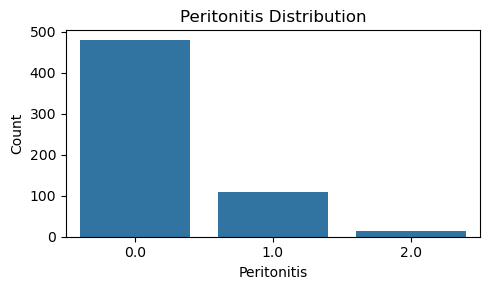

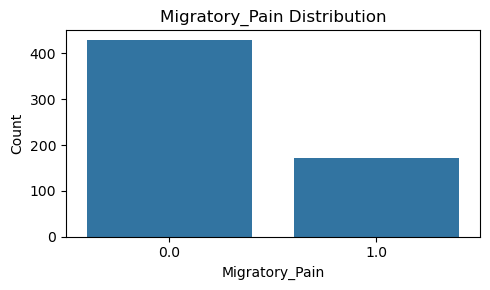

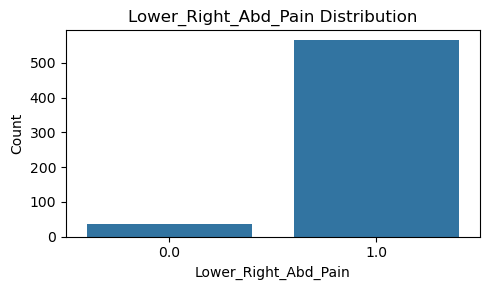

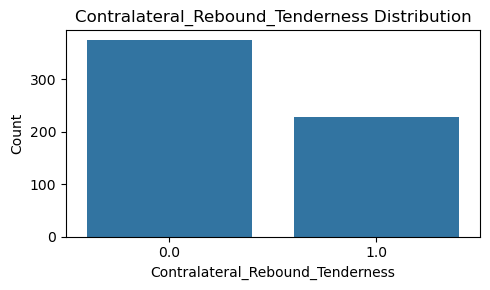

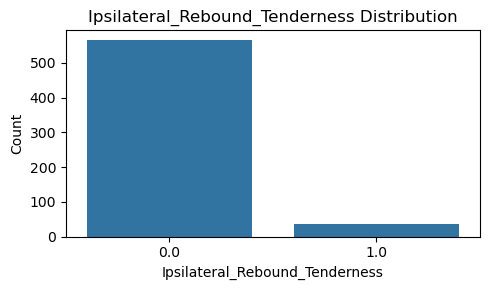

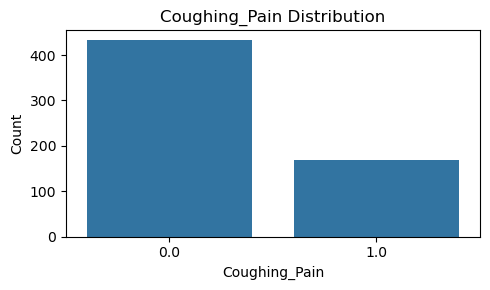

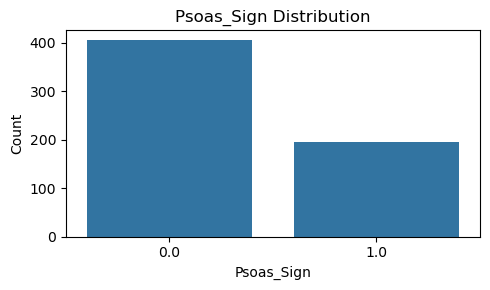

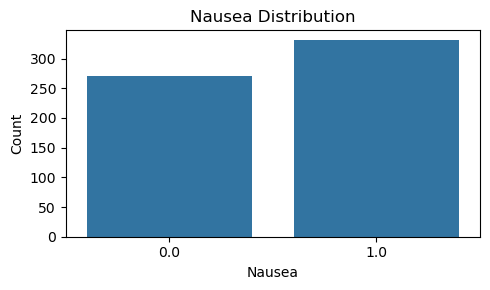

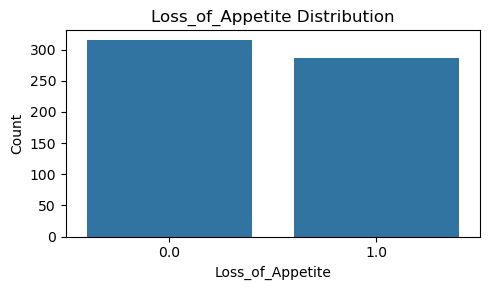

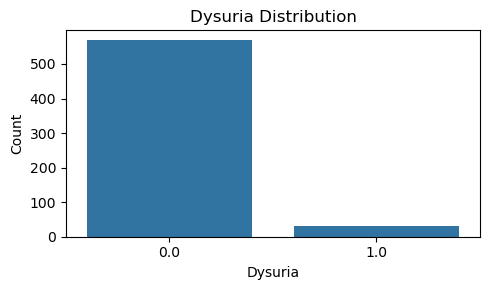

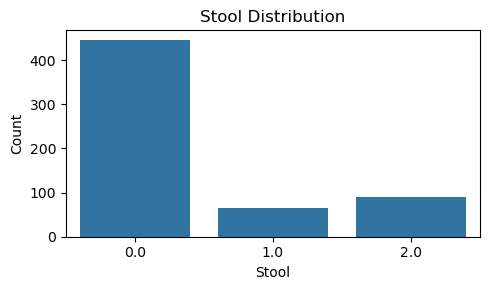

In [14]:
#Perintonitis distribution
clin_head = ['Peritonitis', 'Migratory_Pain', 'Lower_Right_Abd_Pain', 'Contralateral_Rebound_Tenderness', 
            'Ipsilateral_Rebound_Tenderness', 'Coughing_Pain', 'Psoas_Sign', 'Nausea', 
            'Loss_of_Appetite', 'Dysuria', 'Stool']
def countplot_genr(data,headers):
    for header in headers:
        plt.figure(figsize=(5,3))
        unique_values = sorted(data[header].unique())
        sns.countplot(x=data[header])
        plt.title(f"{header} Distribution")
        plt.xlabel(header)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()
countplot_genr(complete_cases, clin_head)

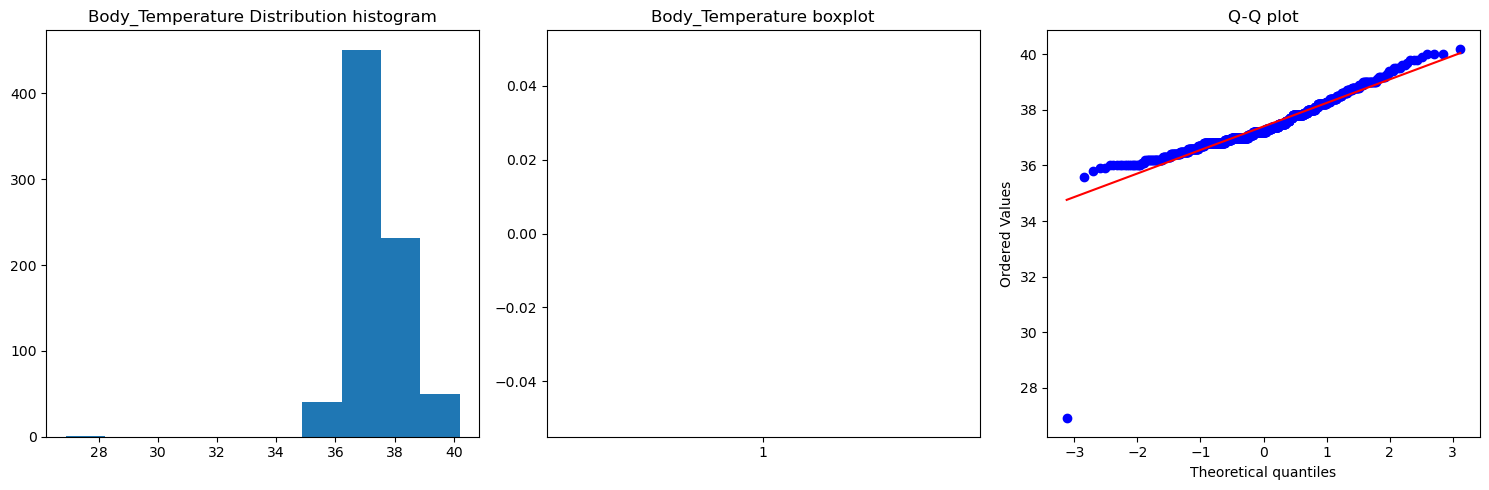

12 Potential outliers (based on IQR method)
103    39.8
221    26.9
235    39.7
324    39.6
364    40.0
430    39.9
522    39.6
591    40.0
703    40.2
718    39.8
742    40.0
743    39.8
Name: Body_Temperature, dtype: float64


In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(clin_data["Body_Temperature"])
plt.title("Body_Temperature Distribution histogram")
plt.subplot(1,3,2)
plt.boxplot(x=clin_data["Body_Temperature"])
plt.title("Body_Temperature boxplot")
plt.subplot(1,3,3)
from scipy import stats
stats.probplot(clin_data["Body_Temperature"].dropna(), plot=plt)
plt.title("Q-Q plot")
plt.tight_layout()
plt.show()
q1 = clin_data["Body_Temperature"].quantile(0.25)
q3 = clin_data["Body_Temperature"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
outliers = clin_data[(clin_data["Body_Temperature"]<lower_bound)|(clin_data["Body_Temperature"]>upper_bound)]
print(f"{len(outliers)} Potential outliers (based on IQR method)")
if len(outliers) > 0:
    print(outliers["Body_Temperature"])

Bivariate Analysis

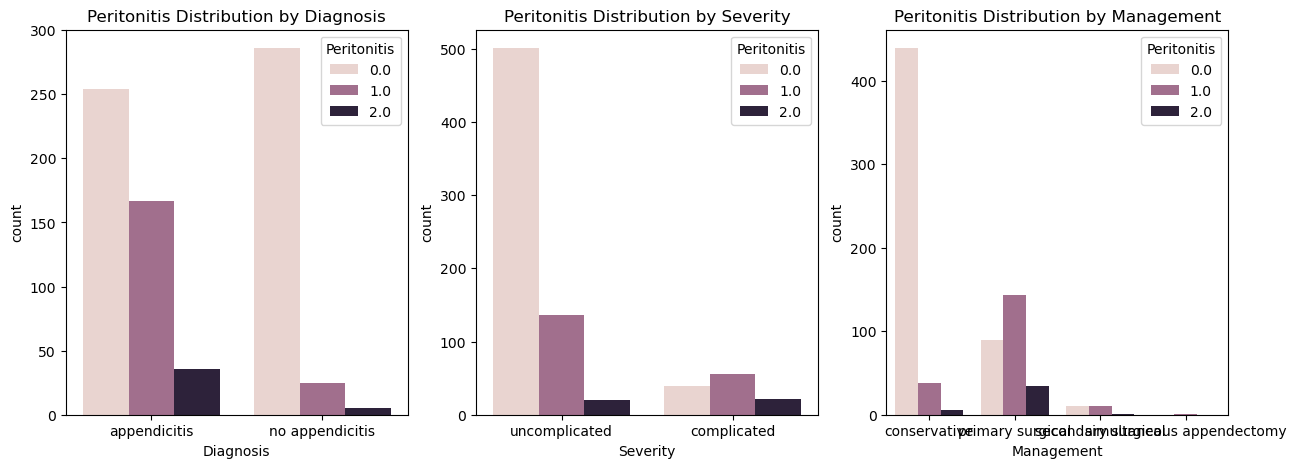

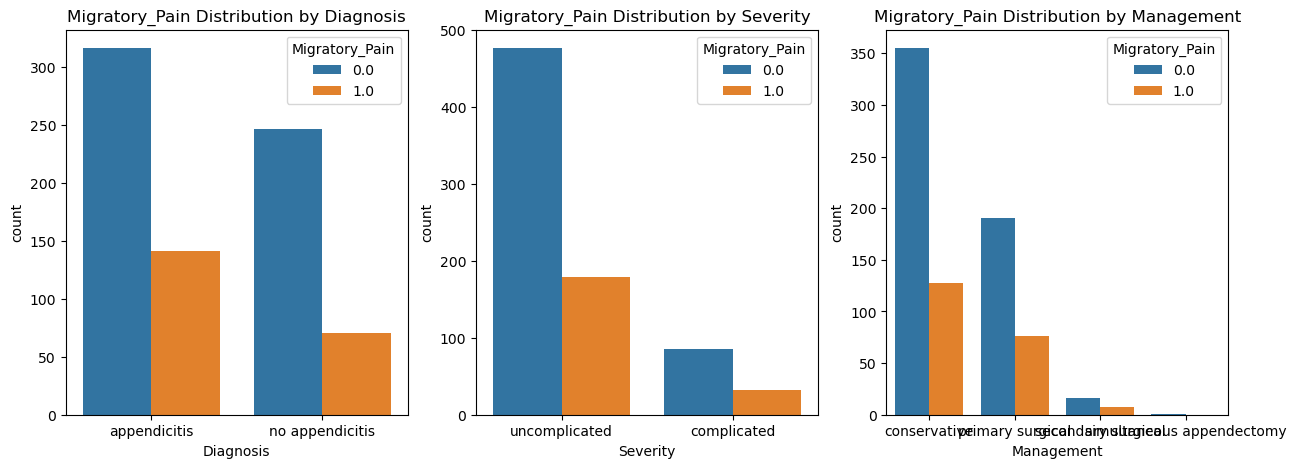

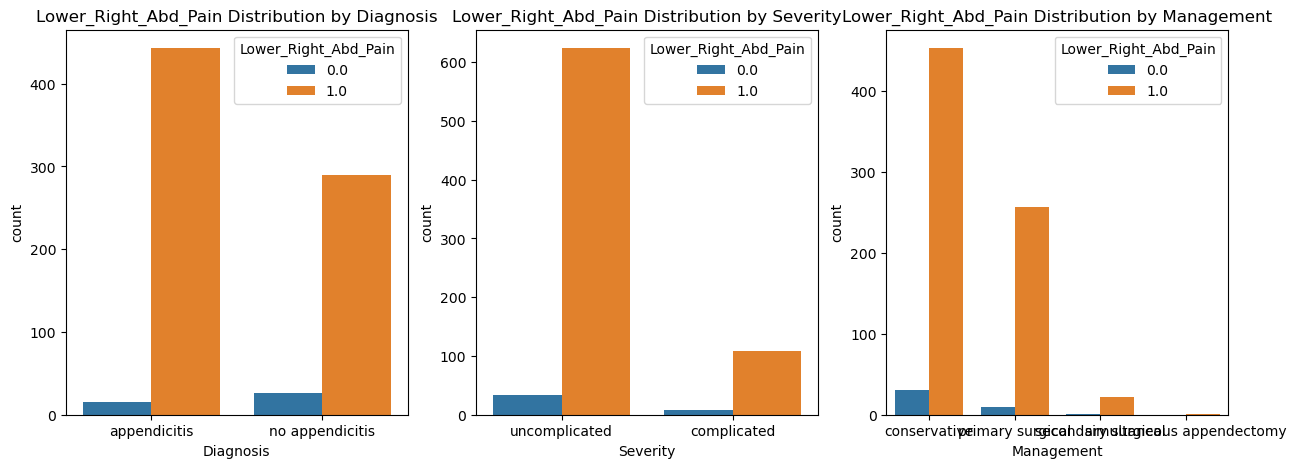

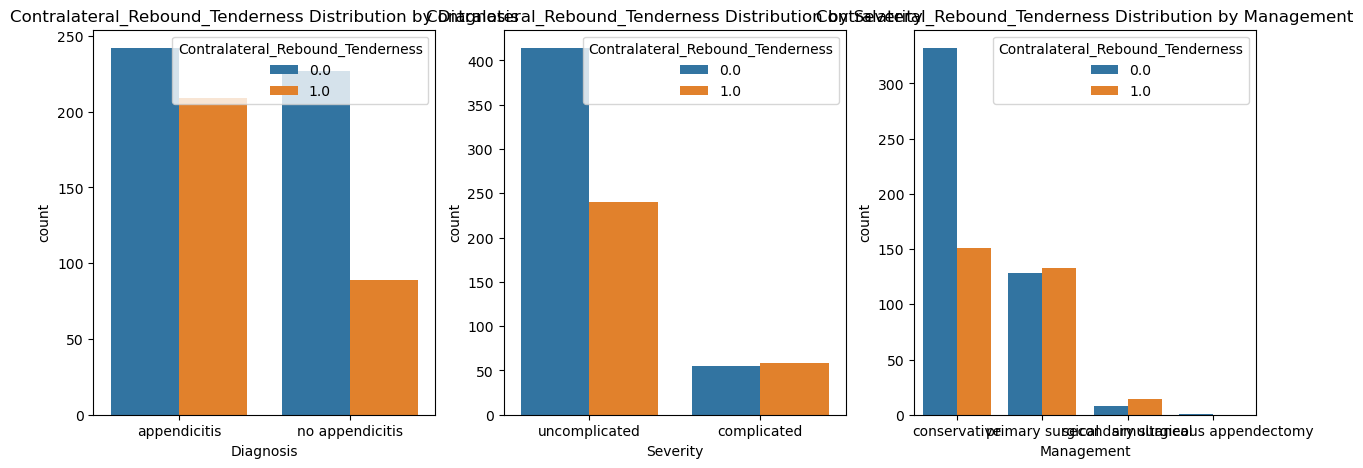

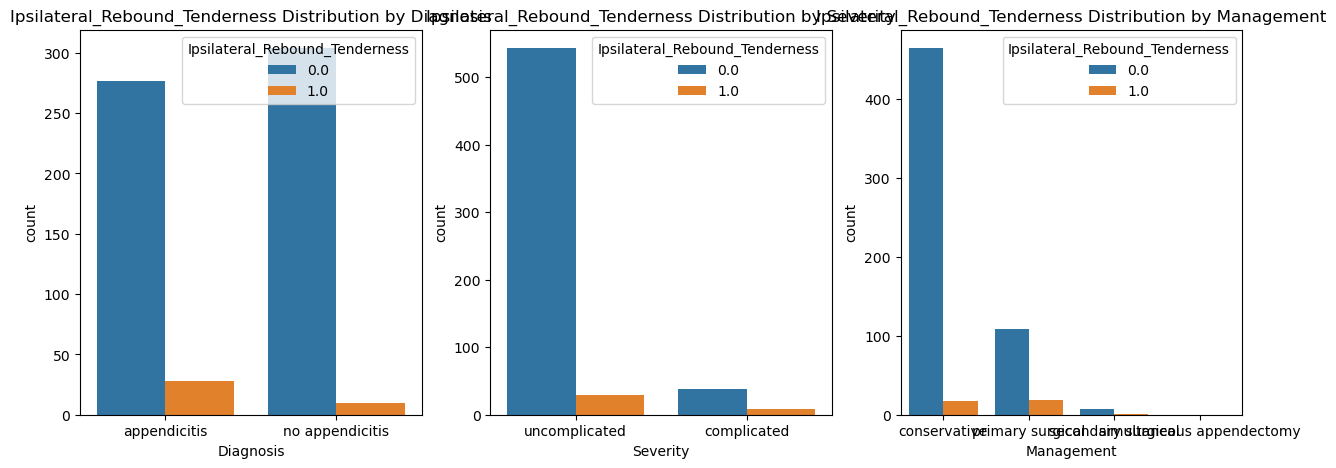

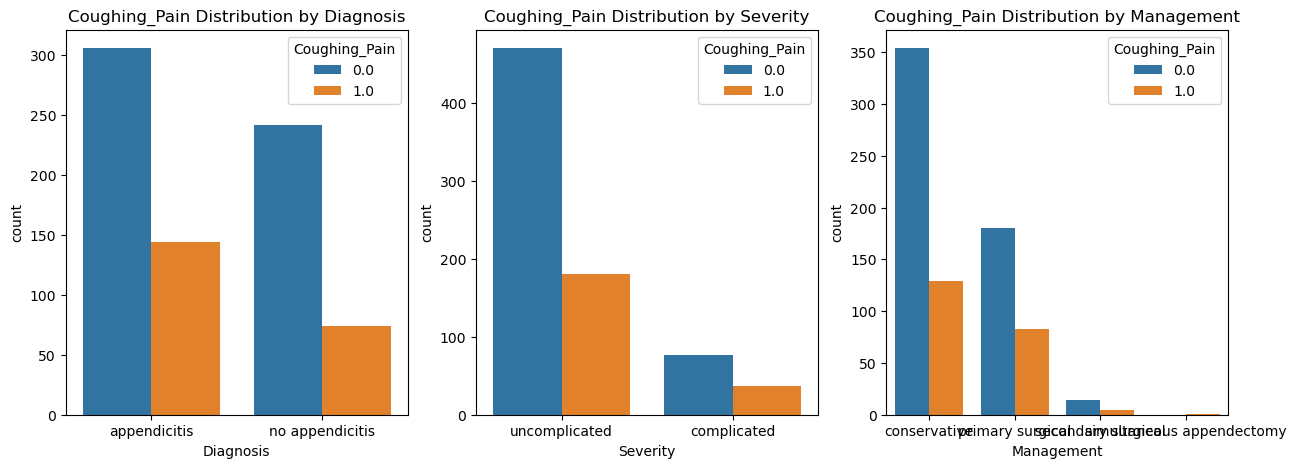

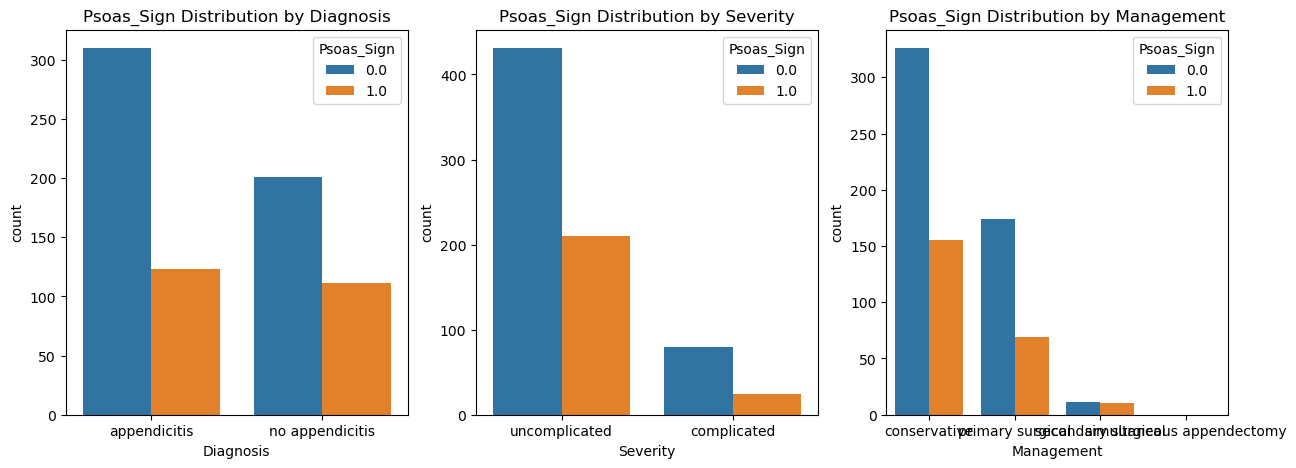

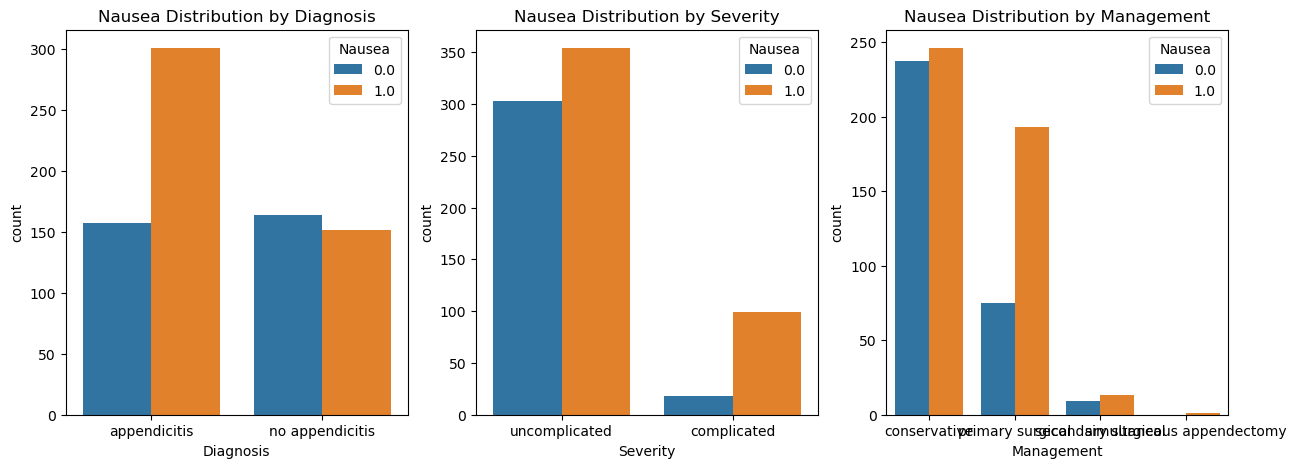

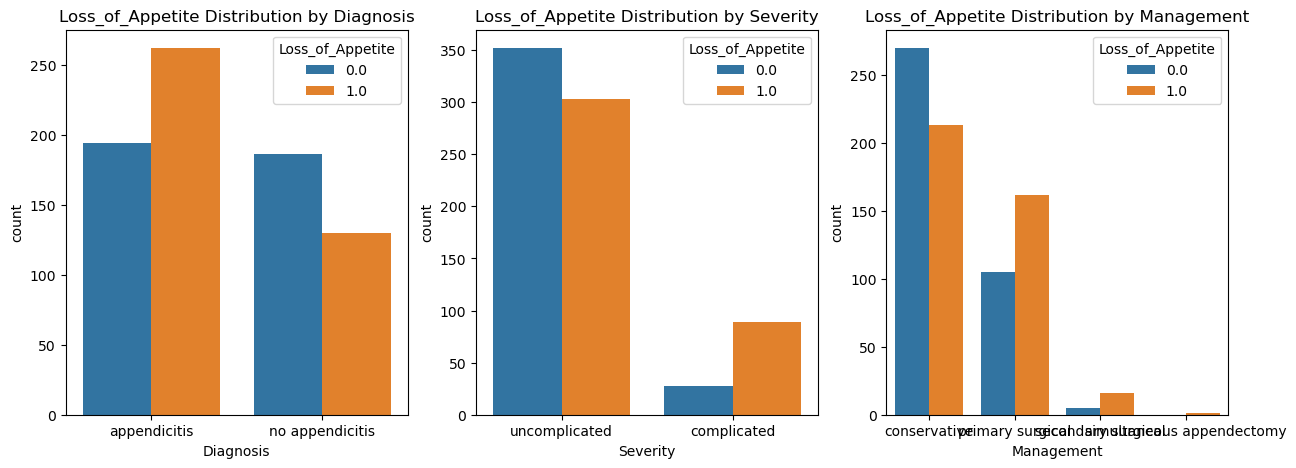

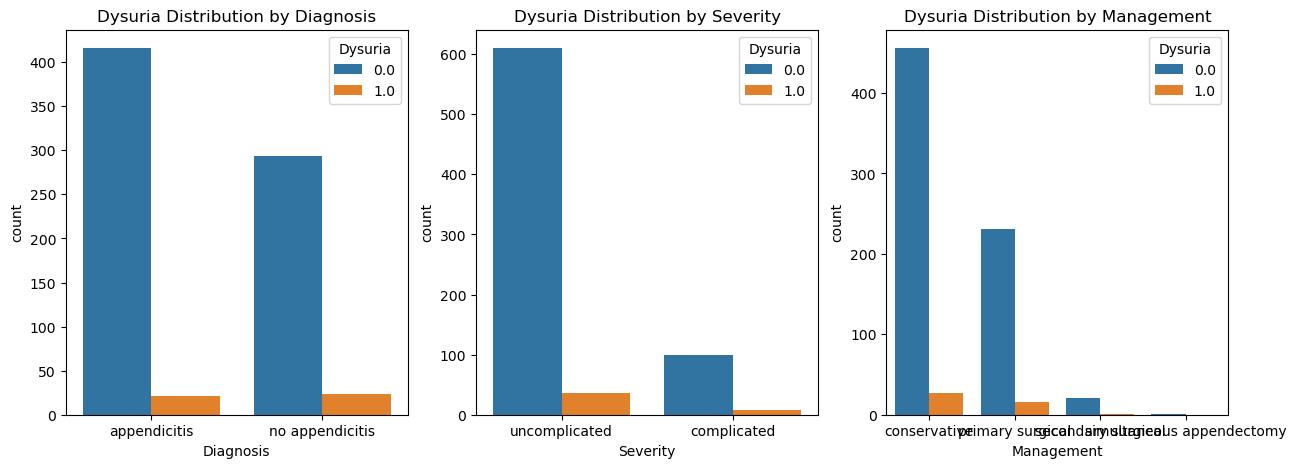

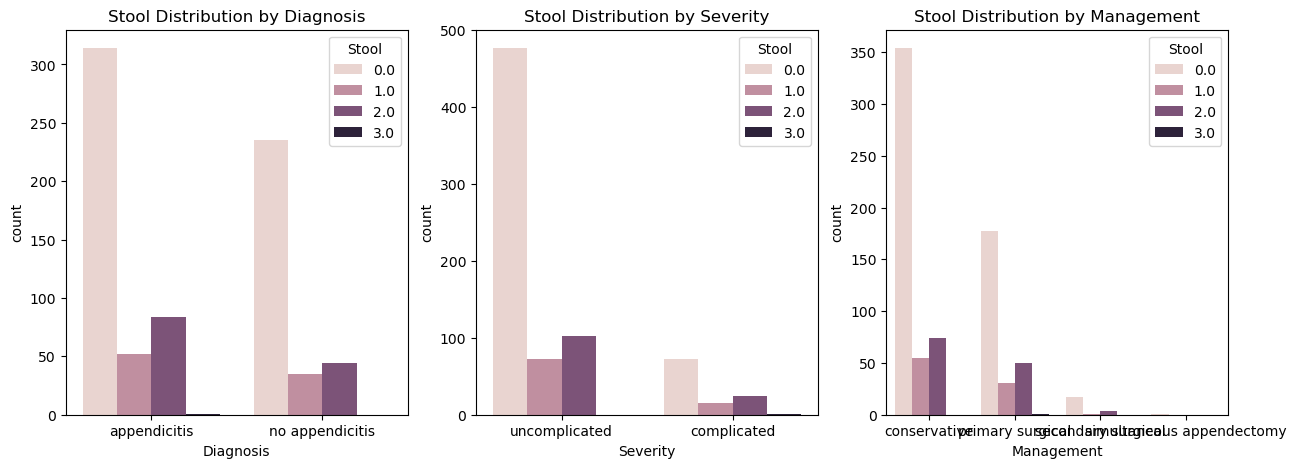

In [16]:
#crosstabulating appendicitis diagnosis with clinical data
#clin_outcomes = ['Diagnosis', 'Severity', 'Management']
def countplot_genr_2(data,headers):
    clin_data_copy = clin_data.copy()
    for header in headers:
        #for outcome in outcomes:
            plt.figure(figsize=(15,5))
            plt.subplot(1,3,1)
            sns.countplot(x='Diagnosis',hue=header ,data=clin_data)
            plt.title(f"{header} Distribution by Diagnosis")
            plt.subplot(1,3,2)
            sns.countplot(x='Severity',hue=header ,data=clin_data)
            plt.title(f"{header} Distribution by Severity")
            plt.subplot(1,3,3)
            sns.countplot(x='Management',hue=header ,data=clin_data)
            plt.title(f"{header} Distribution by Management")
countplot_genr_2(complete_cases, clin_head)

C:\Users\Mahima Batheja\AppData\Local\Temp\ipykernel_31132\1604545387.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = clin_data_copy.groupby(["Body_Temperature_bin", 'Diagnosis']).size().unstack().fillna(0)


<Figure size 1000x400 with 0 Axes>

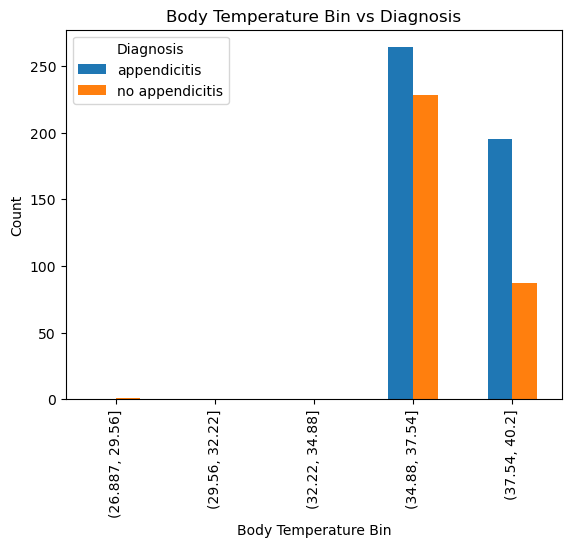

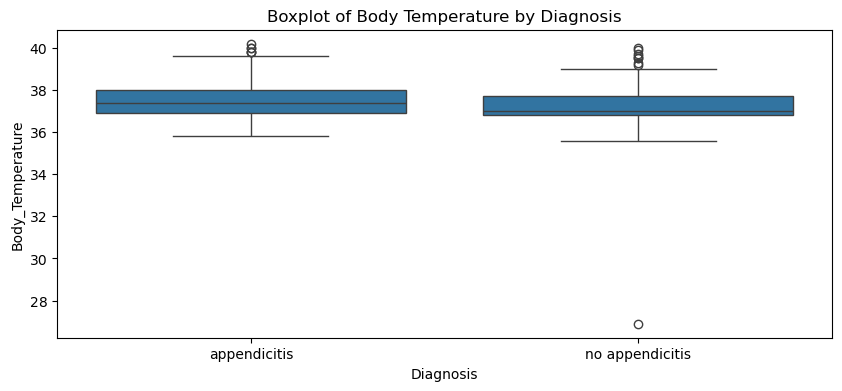

C:\Users\Mahima Batheja\AppData\Local\Temp\ipykernel_31132\1604545387.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts2 = clin_data_copy.groupby(["Body_Temperature_bin", 'Severity']).size().unstack().fillna(0)


<Figure size 1000x400 with 0 Axes>

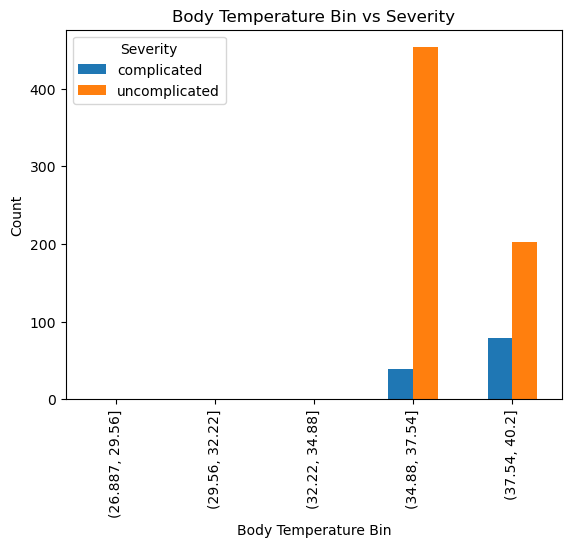

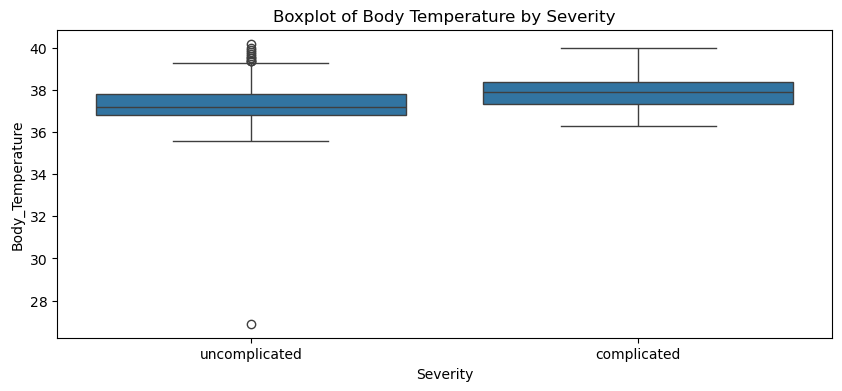

C:\Users\Mahima Batheja\AppData\Local\Temp\ipykernel_31132\1604545387.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts3 = clin_data_copy.groupby(["Body_Temperature_bin", 'Management']).size().unstack().fillna(0)


<Figure size 1000x400 with 0 Axes>

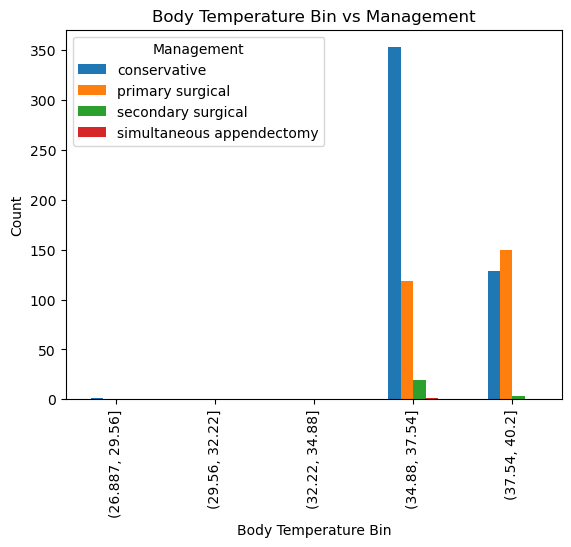

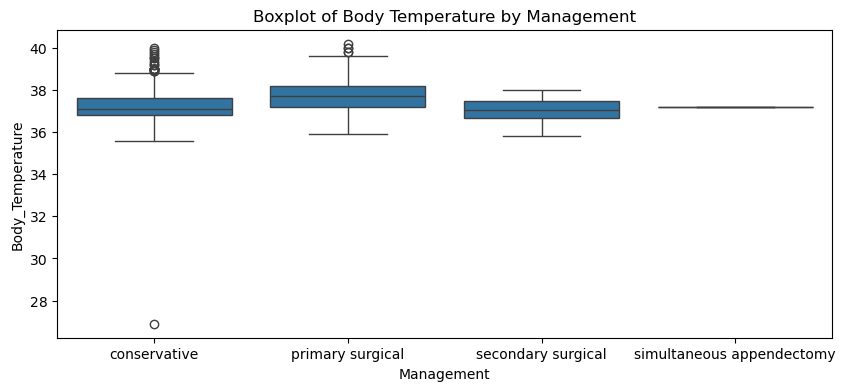

In [17]:
#crosstabulating appendicitis diagnosis with clinical data
#clin_outcomes = ['Diagnosis', 'Severity', 'Management']
clin_data_copy = clin_data.copy()

# 1. Bin the Body_Temperature into 5 bins and create a new column
clin_data_copy["Body_Temperature_bin"] = pd.cut(clin_data_copy["Body_Temperature"], bins=5)

# 2. Generate counts of Body_Temperature_bin vs Diagnosis
counts = clin_data_copy.groupby(["Body_Temperature_bin", 'Diagnosis']).size().unstack().fillna(0)

# 3. Plot the count data (clustered bar plot)
plt.figure(figsize=(10,4))
counts.plot(kind='bar', stacked=False)
plt.title("Body Temperature Bin vs Diagnosis")
plt.xlabel("Body Temperature Bin")
plt.ylabel("Count")
plt.show()

# 4. Boxplot for Body Temperature vs Diagnosis
plt.figure(figsize=(10,4))
sns.boxplot(x='Diagnosis', y='Body_Temperature', data=clin_data_copy)
plt.title("Boxplot of Body Temperature by Diagnosis")
plt.show()

# 5. Generate counts of Body_Temperature_bin vs Severity
counts2 = clin_data_copy.groupby(["Body_Temperature_bin", 'Severity']).size().unstack().fillna(0)

# 6. Plot the count data (clustered bar plot)
plt.figure(figsize=(10,4))
counts2.plot(kind='bar', stacked=False)
plt.title("Body Temperature Bin vs Severity")
plt.xlabel("Body Temperature Bin")
plt.ylabel("Count")
plt.show()

# 7. Boxplot for Body Temperature vs Severity
plt.figure(figsize=(10,4))
sns.boxplot(x='Severity', y='Body_Temperature', data=clin_data_copy)
plt.title("Boxplot of Body Temperature by Severity")
plt.show()

# 8. Generate counts of Body_Temperature_bin vs Management
counts3 = clin_data_copy.groupby(["Body_Temperature_bin", 'Management']).size().unstack().fillna(0)

# 9. Plot the count data (clustered bar plot)
plt.figure(figsize=(10,4))
counts3.plot(kind='bar', stacked=False)
plt.title("Body Temperature Bin vs Management")
plt.xlabel("Body Temperature Bin")
plt.ylabel("Count")
plt.show()

# 10. Boxplot for Body Temperature vs Management
plt.figure(figsize=(10,4))
sns.boxplot(x='Management', y='Body_Temperature', data=clin_data_copy)
plt.title("Boxplot of Body Temperature by Management")
plt.show()

Clinical Features Correlation Matrix

In [18]:
clin_data_only = clin_data[clin_data.columns[:-3]]
correlation = clin_data_only.corr()
print(correlation.round(2))

                                  Peritonitis  Migratory_Pain  \
Peritonitis                              1.00           -0.03   
Migratory_Pain                          -0.03            1.00   
Lower_Right_Abd_Pain                     0.02            0.13   
Contralateral_Rebound_Tenderness         0.08            0.11   
Ipsilateral_Rebound_Tenderness           0.12            0.05   
Coughing_Pain                            0.07            0.09   
Psoas_Sign                              -0.01            0.11   
Nausea                                   0.14            0.09   
Loss_of_Appetite                         0.05            0.10   
Body_Temperature                         0.23           -0.01   
Dysuria                                 -0.08            0.07   
Stool                                    0.10            0.03   

                                  Lower_Right_Abd_Pain  \
Peritonitis                                       0.02   
Migratory_Pain                        

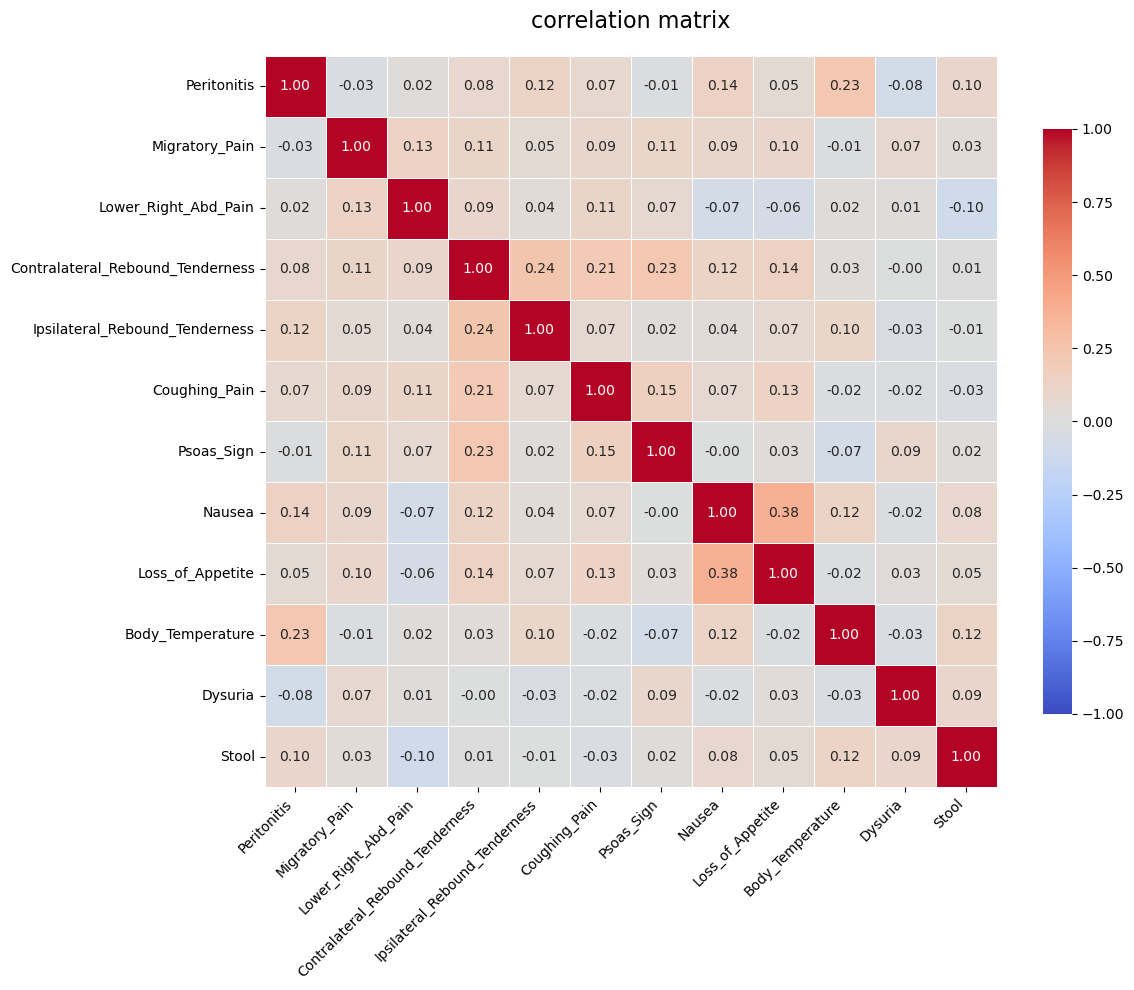

In [19]:
plt.figure(figsize=(12,10))

heatmap = sns.heatmap(correlation,
                     annot=True,
                     fmt= ".2f",
                     cmap='coolwarm',
                     vmin=-1,
                     vmax=1,
                     center=0,
                     linewidths=.5,
                     cbar_kws={"shrink":0.8})

plt.title('correlation matrix', pad=20, fontsize=16)

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')

heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

In [20]:
#correlation with diagnosis
for header in clin_data.columns[0:12]:
    correlation_wdiagnosis = clin_data[header].corr(clin_data['Diagnosis'].replace({'no appendicitis':0, 'appendicitis':1}))
    print(f"Correlation between {header} and Diagnosis: {correlation_wdiagnosis.round(4)}")

Correlation between Peritonitis and Diagnosis: 0.3502
Correlation between Migratory_Pain and Diagnosis: 0.096
Correlation between Lower_Right_Abd_Pain and Diagnosis: 0.1087
Correlation between Contralateral_Rebound_Tenderness and Diagnosis: 0.1836
Correlation between Ipsilateral_Rebound_Tenderness and Diagnosis: 0.1249
Correlation between Coughing_Pain and Diagnosis: 0.0936
Correlation between Psoas_Sign and Diagnosis: -0.0762
Correlation between Nausea and Diagnosis: 0.1758
Correlation between Loss_of_Appetite and Diagnosis: 0.1605
Correlation between Body_Temperature and Diagnosis: 0.1556
Correlation between Dysuria and Diagnosis: -0.052
Correlation between Stool and Diagnosis: 0.0658


C:\Users\Mahima Batheja\AppData\Local\Temp\ipykernel_31132\2153393221.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  correlation_wdiagnosis = clin_data[header].corr(clin_data['Diagnosis'].replace({'no appendicitis':0, 'appendicitis':1}))
